# Package

In [2]:
from hand_func import get_points, handDetector, cut_image_to_rectangle, create_square, small_square
from data_func import clean_Nan_value, get_grayscale, laplace_opencv, show_filtered_data, hog_apply, one_hot_encoding
from tensor_data import count_tensor_data, prepare_image, get_answer
from count_fingers_cnn import Simple_CNN, train, Advanced_CNN, show_comparision, predict_result
from sklearn.metrics import f1_score, confusion_matrix
from model_prediction import count_results
import pandas as pd
import os
import cv2
import torch
from joblib import dump, load
import numpy as np
from PIL import Image
import os
import time
from camera_prediction import count_result
from model_prediction import count_acc, compare_time
import matplotlib.pyplot as plt

pygame 2.5.2 (SDL 2.28.3, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototy

In [3]:
%load_ext autoreload
%autoreload 2
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load models 

In [4]:
s_h_model = Simple_CNN()
s_h_model.load_state_dict(torch.load('Simple-HoG-model.pt'))

a_g_model = Advanced_CNN()
a_g_model.load_state_dict(torch.load('A-gray-model.pt'))

a_h_model = Advanced_CNN()
a_h_model.load_state_dict(torch.load('A-HoG-model.pt'))

a_l_model = Advanced_CNN()
a_l_model.load_state_dict(torch.load('A-LoG-model.pt'))

svm_model = load('SVC()-model.joblib')

# Test dataset

Models will be tested on unknown data how long take them to learn

In [5]:
data = pd.read_csv(r'test\_annotations.csv')

folder_path = r'test'

def load_image(file_name):
    image_path = os.path.join(folder_path, file_name)
    image = cv2.imread(image_path)
    return image

data['image'] = data['filename'].apply(load_image)

In [6]:
data = data.dropna(subset=['image'])

# Create points

In [7]:
detector = handDetector()

data['rectangle'] = data['image'].apply(lambda img: cut_image_to_rectangle(img, detector))
data['points'] = data['image'].apply(lambda img: get_points(detector, img))

C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\izaol\PycharmProjects\projektbigdata\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [8]:
data = clean_Nan_value(data)

C:\Users\izaol\PycharmProjects\projektbigdata\data_func.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rectangle'] = data['rectangle'].apply(lambda x: np.nan if len(x) == 0 else x)


In [9]:
data = data.dropna(subset=['rectangle'])

# CNN

That function will test 20 times models on unknown data to check mean time

In [11]:
list_time_sh, time_sum_sh = compare_time(data, s_h_model, hog_apply)
list_time_ah, time_sum_ah = compare_time(data, a_h_model, hog_apply)
list_time_al, time_sum_al = compare_time(data, a_l_model, laplace_opencv)
list_time_ag, time_sum_ag = compare_time(data, a_g_model, get_grayscale)

C:\Users\izaol\PycharmProjects\projektbigdata\tensor_data.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(small_square)
C:\Users\izaol\PycharmProjects\projektbigdata\tensor_data.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(filter)
C:\Users\izaol\PycharmProjects\projektbigdata\tensor_data.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

# SVM

Counting time for SVM model

In [12]:
list_time_svm = []
time_sum_svm = 0
    
for _ in range(20):
    
    start_time = time.time()
    result, data_, time_ = count_result(data, svm_model)
    end_time = time.time()

    time_result = end_time - start_time - time_
    
    list_time_svm.append(time_result)
    time_sum_svm += time_result

C:\Users\izaol\PycharmProjects\projektbigdata\camera_prediction.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fingers_data[angle_columns] = normalized_angles
C:\Users\izaol\PycharmProjects\projektbigdata\camera_prediction.py:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fingers_data[distance_columns] = normalized_distances
C:\Users\izaol\PycharmProjects\projektbigdata\camera_prediction.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

# Show results

# Visualising results

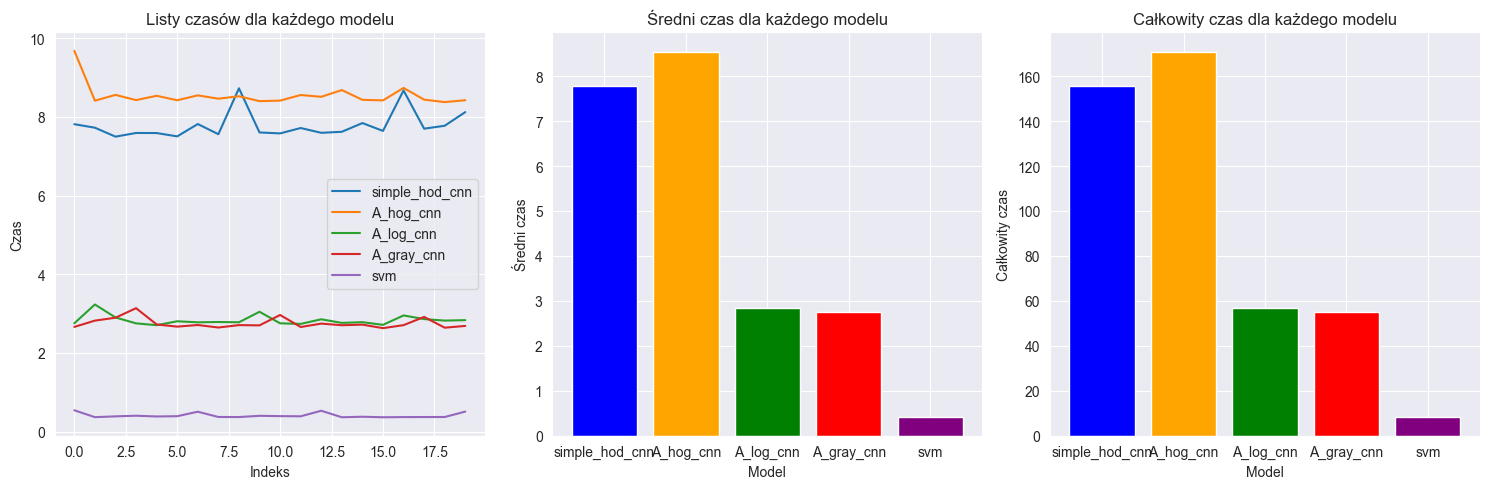

In [13]:
model_names = ['simple_hod_cnn', 'A_hog_cnn', 'A_log_cnn', 'A_gray_cnn', 'svm']

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
for times, name in zip([list_time_sh, list_time_ah, list_time_al, list_time_ag, list_time_svm], model_names):
    plt.plot(times, label=name)
plt.xlabel('Indeks')
plt.ylabel('Czas')
plt.legend()
plt.title('Listy czasów dla każdego modelu')

mean_times = [np.mean(times) for times in [list_time_sh, list_time_ah, list_time_al, list_time_ag, list_time_svm]]

plt.subplot(1, 3, 2)
plt.bar(model_names, mean_times, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Średni czas')
plt.title('Średni czas dla każdego modelu')

total_times = [time_sum_sh, time_sum_ah, time_sum_al, time_sum_ag, time_sum_svm]

plt.subplot(1, 3, 3)
plt.bar(model_names, total_times, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Całkowity czas')
plt.title('Całkowity czas dla każdego modelu')

plt.tight_layout()
plt.show()